# HUMAN CLASSIFICATION / DETECTION
## Training SVM and Random Forest classifier with Histogram of Gradients (HoG) features

In [66]:
#!pip install pandas
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
from sklearn.metrics import classification_report,accuracy_score
import cv2
from skimage import io

 1. Create categories {pos,neg}
 2. Read data {Train, Test}
 3. Resize -> HoG -> convert to array -> define input(x) and output(y)
 4. Train SVM
 5. Predict using SVM

# TRAINING
##### Apply Histogram of Gradients (HoG)

In [67]:
def show(img):
    """
    Nothing to show
    """
    io.imshow(img)
    plt.show()

Categories=['pos','neg']

flat_data_arr=[] #input array
target_arr=[] #output array

datadir='../Assignment/Assignment 1/INRIA_Dataset_Samples/Train' 
#path which contains all the categories of images

for i in Categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    #../Assignment/Assignment 1/INRIA_Dataset_Samples/Train/neg,pos
    for img in os.listdir(path):
    #for each image in neg and pos Train folder
        img_array=imread(os.path.join(path,img))
        #read each image
        img_resized=resize(img_array,(128,64,3))
        #resize each image
        fd, hog_image = hog(img_resized, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
        #apply HoG on each image
        flat_data_arr.append(fd)
        #flatten each image
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')

loading... category : pos
loaded category:pos successfully
loading... category : neg
loaded category:neg successfully


##### Create dataframe and arrange Input(X) and Output(Y)

In [68]:
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

#### Train using Support Vector Machines

In [69]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
#param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC()
# model=GridSearchCV(svc,param_grid)
svc.fit(x,y)
print('The Model is trained well with the given images')

The Model is trained well with the given images


#### Train using Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x,y)
print('The Model is trained well with the given images')

The Model is trained well with the given images


# TESTING
##### Apply Histogram of Gradients (HoG)

In [72]:
Categories=['pos','neg']

flat_data_arr=[] #input array
target_arr=[] #output array
original_image=[]
hog_image=[]
datadir='../Assignment/Assignment 1/INRIA_Dataset_Samples/Test' 
#path which contains all the categories of images

for i in Categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    #../Assignment/Assignment 1/INRIA_Dataset_Samples/Train/neg,pos
    for img in os.listdir(path):
    #for each image in neg and pos Train folder
        img_array=imread(os.path.join(path,img))
        #read each image
        img_resized=resize(img_array,(128,64,3))
        #resize each image
        original_image.append(img_resized)
        #save original image
        fd, image_of_hog = hog(img_resized, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
        #apply HoG on each image
        hog_image.append(image_of_hog)
        flat_data_arr.append(fd)
        #flatten each image
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')

loading... category : pos
loaded category:pos successfully
loading... category : neg
loaded category:neg successfully


##### Create dataframe and arrange Input(X) and Output(Y)

In [73]:
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

#### Predict using Support Vector Machines

In [74]:
y_pred = svc.predict(x)
print("Accuracy using SVM: "+str(accuracy_score(y, y_pred)))
print('\n')
print(classification_report(y, y_pred))

Accuracy using SVM: 0.9400630914826499


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1132
           1       0.91      0.87      0.89       453

    accuracy                           0.94      1585
   macro avg       0.93      0.92      0.93      1585
weighted avg       0.94      0.94      0.94      1585



#### Visualize SVM's top 10 Results (Incorrect + Correct Classification)

SVM's Incorrectly Classified Image


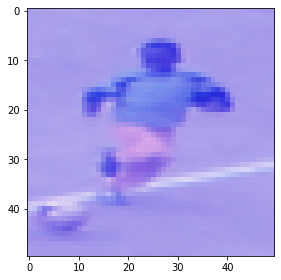

SVM's Incorrectly Classified Image


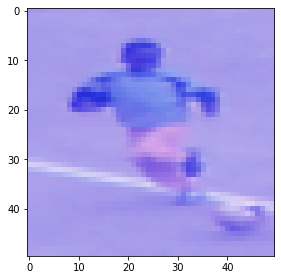

SVM's Correctly Classified Image


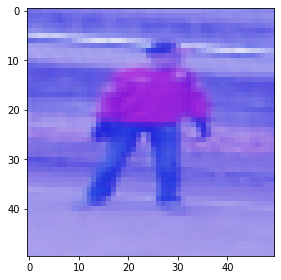

SVM's Correctly Classified Image


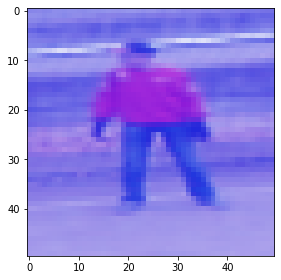

SVM's Correctly Classified Image


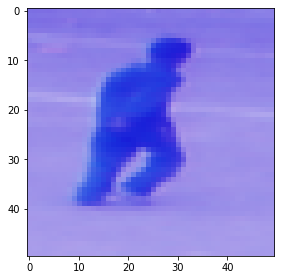

SVM's Correctly Classified Image


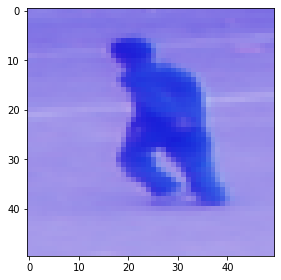

SVM's Correctly Classified Image


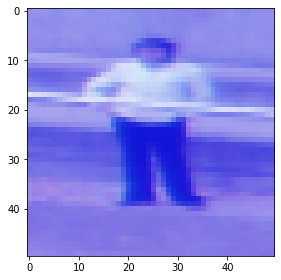

SVM's Correctly Classified Image


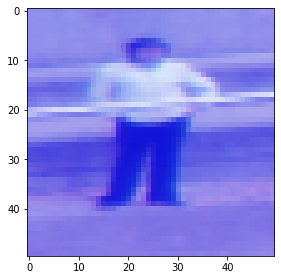

SVM's Correctly Classified Image


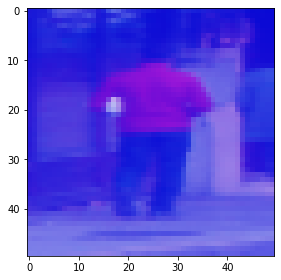

SVM's Correctly Classified Image


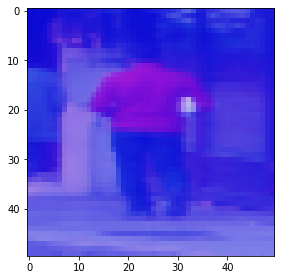

In [75]:
incorrect=[]
correct=[]
for i in range(10):
    if y[i] != y_pred[i]:
        incorrect.append(i)
    elif y[i] == y_pred[i]:
        correct.append(i)

for img in incorrect:
    print("SVM's Incorrectly Classified Image")
    show(cv2.resize(original_image[img], (50,50)))
    
for img in correct:
    print("SVM's Correctly Classified Image")
    show(cv2.resize(original_image[img], (50,50)))
# show(hog_image[2])

#### Predict using Random Forest

In [76]:
y_pred = rf.predict(x)
print("Accuracy using Random Forest: "+str(accuracy_score(y, y_pred)))
print('\n')
print(classification_report(y, y_pred))

Accuracy using Random Forest: 0.9173501577287066


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1132
           1       0.90      0.80      0.85       453

    accuracy                           0.92      1585
   macro avg       0.91      0.88      0.90      1585
weighted avg       0.92      0.92      0.92      1585



#### Visualize Random Forest's top 10 Results (Incorrect + Correct Classification)

Random Forest's Incorrectly Classified Image


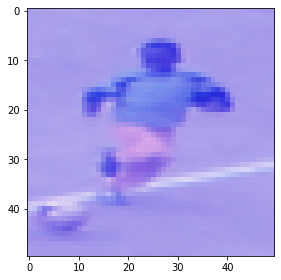

Random Forest's Incorrectly Classified Image


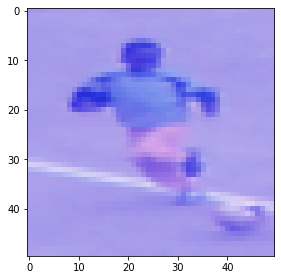

Random Forest's Correctly Classified Image


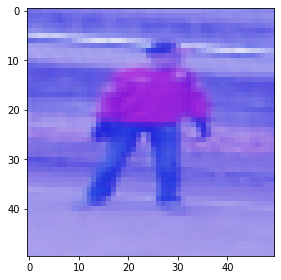

Random Forest's Correctly Classified Image


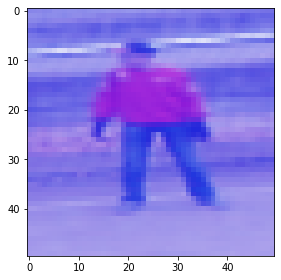

Random Forest's Correctly Classified Image


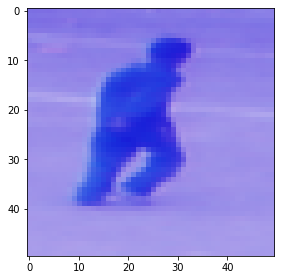

Random Forest's Correctly Classified Image


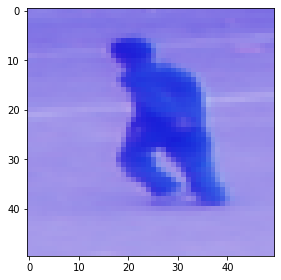

Random Forest's Correctly Classified Image


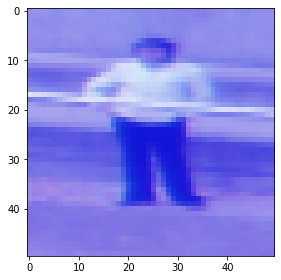

Random Forest's Correctly Classified Image


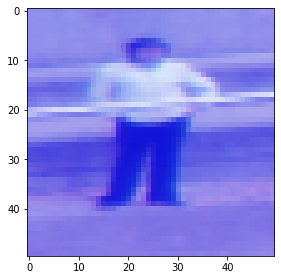

Random Forest's Correctly Classified Image


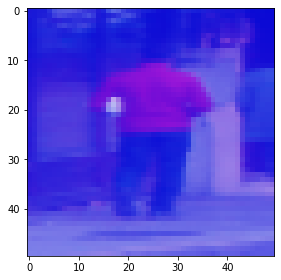

Random Forest's Correctly Classified Image


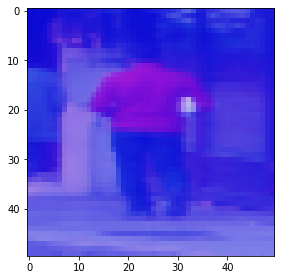

In [78]:
incorrect=[]
correct=[]
for i in range(10):
    if y[i] != y_pred[i]:
        incorrect.append(i)
    elif y[i] == y_pred[i]:
        correct.append(i)

for img in incorrect:
    print("Random Forest's Incorrectly Classified Image")
    show(cv2.resize(original_image[img], (50,50)))
    
for img in correct:
    print("Random Forest's Correctly Classified Image")
    show(cv2.resize(original_image[img], (50,50)))
# show(hog_image[2])


### References
https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html <br>
https://www.kaggle.com/manikg/training-svm-classifier-with-hog-features <br>
https://medium.com/analytics-vidhya/image-classification-using-machine-learning-support-vector-machine-svm-dc7a0ec92e01